In [1]:
import numpy as np
import pandas as pd
import seaborn as sn

from matplotlib import pyplot as plt
from scipy.special import expit
from scipy import optimize
import math



%matplotlib inline

# 1. Logistic Regression - Example 1
## A. Plotting

In [2]:
#reading the data from the file.
data_ex1  = pd.read_csv('/Users/deepanjal.gupta/Documents/Learning/Stanford Machine Learning- Andrew Ng/Week 3/machine-learning-ex2/ex2/ex2data1.txt', header = None)

#giving names to the dataframe columns.
data_ex1.columns  = ['Exam1','Exam2','Output']

#adding the x0 feature for the data.
data_ex1['x0'] = 1

#rearranging the dataframe column order. 
data_ex1 = data_ex1.loc[:,['x0','Exam1','Exam2','Output']]

In [3]:
data_ex1.head(4)

,x0,Exam1,Exam2,Output
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1


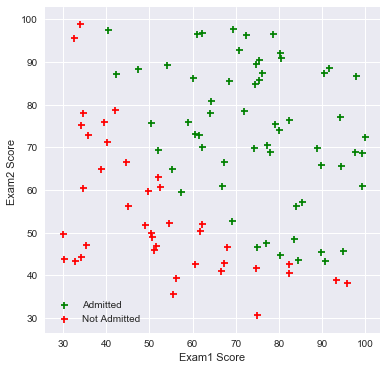

In [4]:
#Plotting the scatter plot
x_yes = data_ex1[data_ex1['Output'] == 1]['Exam1']
y_yes = data_ex1[data_ex1['Output'] == 1]['Exam2']

x_no = data_ex1[data_ex1['Output'] == 0]['Exam1']
y_no = data_ex1[data_ex1['Output'] == 0]['Exam2']

plt.figure(figsize = (6,6))
plt.grid(True)
plt.scatter(x_yes,y_yes,marker = '+',c = 'g',label = 'Admitted')
plt.scatter(x_no,y_no,marker = '+',c = 'r',label = 'Not Admitted')

plt.xlabel('Exam1 Score')
plt.ylabel('Exam2 Score ')
plt.legend(loc = 3)
plt.show()

## B. Defining the Functions

In [5]:
m = data_ex1.shape[0]
lambda_input = 0
X = np.array(data_ex1.loc[:,['x0','Exam1','Exam2']])
y = np.array(data_ex1.loc[:,['Output']]).reshape(data_ex1.shape[0],1)
theta = np.zeros((X.shape[1],1))
input_lambda = 0
#theta = np.ones((X.shape[1],1))
print (m)
print (X.shape)
print (y.shape)


100
(100, 3)
(100, 1)


In [6]:
def hypothesis(X, theta):
    #hypothesis(X, theta)
    
    return expit(np.dot(X,theta))
    


def cost_function(theta,m,X,y,input_lambda = 0.0):
    
    #cost_function(theta,m,X,y)
    term_1 = np.dot(np.log(hypothesis(X,theta)).T,y)
    term_2 = np.dot(np.log(1-hypothesis(X,theta)).T,(1- y))
    reg    = float(np.dot(theta[1:].T,theta[1:]))*input_lambda/(2*m)
    
    J =  -np.sum(term_1+term_2)/m +reg
    
    return J
    
def optimize_theta(m,X,y,theta,input_lambda = 0.0):
    result = optimize.fmin(cost_function, x0=theta, args=(m,X,y,input_lambda), maxiter=1000, full_output=True)
    
    return result[0],result[1]


In [7]:
theta, min_cost = optimize_theta(m,X,y,theta)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287


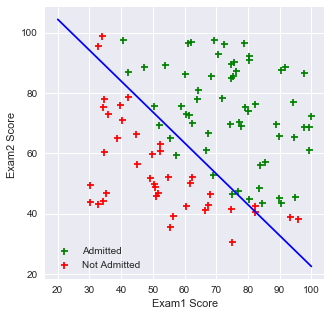

In [8]:
x_yes = data_ex1[data_ex1['Output'] == 1]['Exam1']
y_yes = data_ex1[data_ex1['Output'] == 1]['Exam2']

x_no = data_ex1[data_ex1['Output'] == 0]['Exam1']
y_no = data_ex1[data_ex1['Output'] == 0]['Exam2']

decision_x = np.array([20,100])
decision_y = -(theta[0] + theta[1]*decision_x)/(theta[2])

plt.figure(figsize = (5,5))
plt.grid(True)
plt.scatter(x_yes,y_yes,marker = '+',c = 'g',label = 'Admitted')
plt.scatter(x_no,y_no,marker = '+',c = 'r',label = 'Not Admitted')
plt.plot(decision_x,decision_y,c = 'b')


plt.xlabel('Exam1 Score')
plt.ylabel('Exam2 Score ')
plt.legend(loc = 3)
plt.show()

In [9]:
data_ex1['Predicion'] = (hypothesis(X, theta) >= 0.5)
print ('Wrong Predictions')
print (data_ex1[data_ex1['Predicion'] != data_ex1['Output']])

Wrong Predictions
    x0      Exam1      Exam2  Output  Predicion
7    1  75.024746  46.554014       1      False
10   1  95.861555  38.225278       0       True
16   1  69.070144  52.740470       1      False
27   1  93.114389  38.800670       0       True
33   1  52.045405  69.432860       1      False
36   1  33.915500  98.869436       0       True
43   1  82.368754  40.618255       0       True
57   1  32.577200  95.598548       0       True
79   1  82.226662  42.719879       0       True
83   1  57.238706  59.514282       1      False
98   1  55.340018  64.931938       1      False


#  2. Regularized Logistic Regression

In [10]:
#reading the data from the file to a pandas dataframe.
data_ex2 = pd.read_csv('/Users/deepanjal.gupta/Documents/Learning/Stanford Machine Learning- Andrew Ng/Week 3/machine-learning-ex2/ex2/ex2data2.txt',header = None,names = ['Test1','Test2','Output'])

#adding the x0 feature for the data.
#data_ex2['x0'] = 1

#rearranging the dataframe column order. 
#data_ex2 = data_ex2.loc[:,['x0','Test1','Test2','Output']]

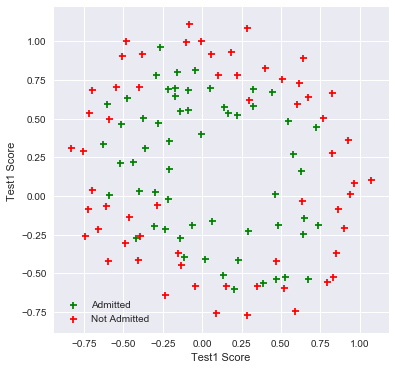

In [11]:
#Plotting the scatter plot
x_yes = data_ex2[data_ex2['Output'] == 1]['Test1']
y_yes = data_ex2[data_ex2['Output'] == 1]['Test2']

x_no = data_ex2[data_ex2['Output'] == 0]['Test1']
y_no = data_ex2[data_ex2['Output'] == 0]['Test2']

plt.figure(figsize = (6,6))
plt.grid(True)
plt.scatter(x_yes,y_yes,marker = '+',c = 'g',label = 'Admitted')
plt.scatter(x_no,y_no,marker = '+',c = 'r',label = 'Not Admitted')

plt.xlabel('Test1 Score')
plt.ylabel('Test1 Score ')
plt.legend(loc = 3)
plt.show()

In [12]:
df_params = pd.DataFrame()

In [13]:
limit = 6
for i in range(0,limit+1):
    for j in range(0,limit+1):
        if ((i+j) <=limit):
            a =  ('x'+str(i)+'y'+str(j))
            df_params [a] = (data_ex2['Test1']**i)*(data_ex2['Test2']**j)

In [14]:
m = data_ex2.shape[0]
X = np.array(df_params)
y = np.array(data_ex2.loc[:,['Output']]).reshape(m,1)
input_lambda = 0
theta = np.zeros((X.shape[1],1))
#theta = np.ones((X.shape[1],1))
print (m)
print (X.shape)
print (y.shape)

118
(118, 28)
(118, 1)


In [15]:
# fmin was not converging 
def optimize_theta_minimize(m,X,y,theta,input_lambda = 0.0):
    result = optimize.minimize(cost_function, x0=theta, args=(m,X,y,input_lambda),method='BFGS', options={"maxiter":500, "disp":False})
    theta = result.x.reshape(X.shape[1],1)
    min_cost = result.fun
    
    return theta,min_cost
    

In [16]:
theta , cost_min = optimize_theta_minimize(m,X,y,theta,input_lambda)

In [17]:
data_ex2['Predicion'] = (hypothesis(X, theta) >= 0.5)
print ('Wrong Predictions for lambda: '  + str(input_lambda))
(data_ex2[data_ex2['Predicion'] == data_ex2['Output']]).shape[0]/data_ex2.shape[0]

Wrong Predictions for lambda: 0


0.8898305084745762

In [18]:
xvals = np.linspace(-1,1.5,50)
yvals = np.linspace(-1,1.5,50)

xx,yy = np.meshgrid(xvals,yvals)


a = []
b = []
for i in xvals:
    for j in yvals:
        a.append(i)
        b.append(j)


df_plotting = pd.DataFrame()
df_params_2 = pd.DataFrame()

df_plotting['Test1']= a
df_plotting['Test2']= b


limit = 6
for i in range(0,limit+1):
    for j in range(0,limit+1):
        if ((i+j) <=limit):
            a =  ('x'+str(i)+'y'+str(j))
            df_params_2 [a] = (df_plotting['Test1']**i)*(df_plotting['Test2']**j)
            
            
zvals= hypothesis(df_params_2,theta)
zvals = zvals.reshape(xx.shape)

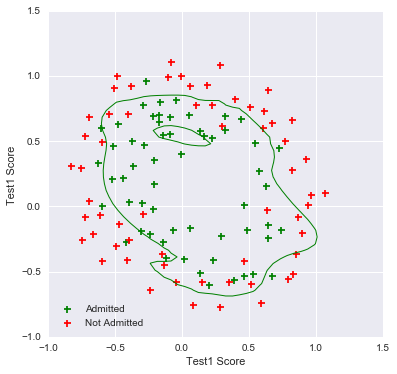

In [19]:
#Plotting the scatter plot
x_yes = data_ex2[data_ex2['Output'] == 1]['Test1']
y_yes = data_ex2[data_ex2['Output'] == 1]['Test2']

x_no = data_ex2[data_ex2['Output'] == 0]['Test1']
y_no = data_ex2[data_ex2['Output'] == 0]['Test2']

plt.figure(figsize = (6,6))
plt.grid(True)
plt.scatter(x_yes,y_yes,marker = '+',c = 'g',label = 'Admitted')
plt.scatter(x_no,y_no,marker = '+',c = 'r',label = 'Not Admitted')
plt.contour(xx,yy, zvals, [0.5], linewidths=1, colors='g')


plt.xlabel('Test1 Score')
plt.ylabel('Test1 Score ')
plt.legend(loc = 3)
plt.show()
